# 태풍 경로 및 강풍반경 그리기

기상청 태풍 찾아보기 https://www.weather.go.kr/weather/typoon/typhoon_06_01.jsp  
링링 검색 후 나오는 중심 좌표 및 강풍 반경 csv 파일로 저장하여 사용  

In [ ]:
# 필요한 패키지 임포트
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd

from metpy.calc import wind_components, altimeter_to_sea_level_pressure
from metpy.cbook import get_test_data
from metpy.plots import (add_metpy_logo, simple_layout, StationPlot,
                         StationPlotLayout, wx_code_map)
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units

In [31]:
path7 = r'/Users/hojjunekim/Desktop/Final_project/Lingling.csv'
ring = pd.read_csv(path7)
data = {}
data['Ling_longitude'] = ring['longitude'].values
data['Ling_latitude'] = ring['latitude'].values
data['Ling_radius'] = ring['radius'].values
print(data['Ling_radius'][5])

240


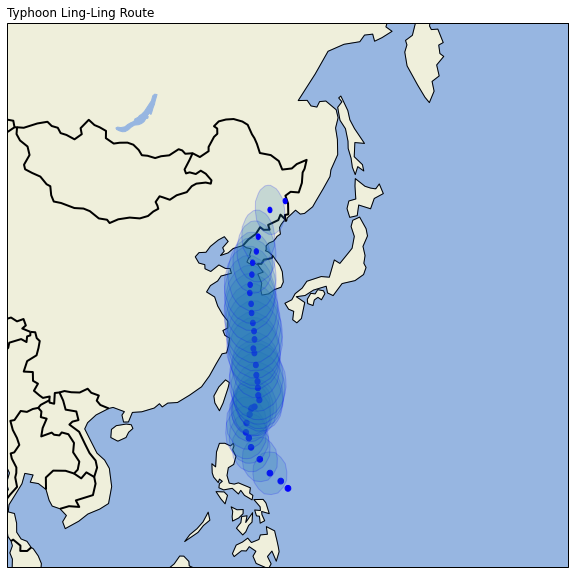

In [33]:
# Create the figure and an axes set to the projection
plt.rcParams['savefig.dpi'] = 255
fig = plt.figure(figsize=(20, 10))
proj = ccrs.LambertConformal(central_longitude=120, central_latitude=35,
                             standard_parallels=[35])
ax = fig.add_subplot(1, 1, 1, projection=proj)

# Add some various map elements to the plot to make it recognizable
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS, linewidth=2)

# Set plot bounds
ax.set_extent((100, 155, 5, 60))


#Lingling plot
for i in range(len(data['Ling_longitude'])):
    try:
        width = int(data['Ling_radius'][i])/110
        height = int(data['Ling_radius'][i])/90
        r = width
    except:
        width = 0
        height = 0
        r = 0
    ellipse = mplt.patches.Ellipse((data['Ling_longitude'][i], data['Ling_latitude'][i]), 2*width,2*height, ec = 'b', transform=ccrs.PlateCarree(), alpha=0.2)
    circle = plt.Circle((data['Ling_longitude'][i], data['Ling_latitude'][i]), 0.3, ec = 'b', fc = 'b', transform=ccrs.PlateCarree())
    ax.add_artist(ellipse)
    ax.add_artist(circle)
    
ax.set_title('Typhoon Ling-Ling Route'
              ,loc='left')

plt.show()